## Exploratory Data Analysis on California Housing Dataset

### Final Dataset Summary After EDA

- The dataset now contains **110,519 entries** and **45 engineered features**.
- Cleaned invalid ages and encoded the target column (`no_show_bin`) as binary (0 = Show, 1 = No-show).
- Engineered categorical variables using one-hot encoding and binary flags for:
  - Gender
  - Age groups (binned into <18, 18–35, 36–60, 60+)
  - Neighborhood income categories
  - Wait days, Scheduled day, and Appointment day (weekday dummies)
- Created interaction features like:
  - `alcoholism` by gender and age group
  - `handicap_binary` and its age-based interaction
  - Patient-level historical metrics: `past_appointments`, `patient_no_show_rate`
- Engineered time-based features: `wait_days`, `sched_hour`, and `wait_bin` categories.

The dataset is now well-structured for both classical models and neural networks, with all features converted to numeric format.

1. Loading and Exploring dataset properties

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("medical_no_show.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [242]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [243]:
print("Shape of dataset:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())

Shape of dataset: (110527, 14)

Missing values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [244]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [245]:
df.columns = df.columns.str.strip().str.replace('-', '_').str.lower()
df.columns = df.columns.str.strip().str.replace('-', '_').str.lower()
df = df.rename(columns={
    'hipertension': 'hypertension',
    'handcap': 'handicap'
})


In [246]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [247]:
df.duplicated().sum()

np.int64(0)

### Datatypes of features

- Binary Classified : `scholarship`, `hypertension`, `diabetes`, `alcoholism`, `handicap`, `sms_received`, `gender`
- Numerical : `age`
- Multiclass Classified : `neighbourhood`
- Others : `patientid`, `appointmentid`, `scheduledday`, `appointmentday` (For these, datatype conversion will be required during EDA)

### Target

- Classified
- Highly Imbalanced Dataset
- Will be taken care during EDA

### Univariate Analysis

#### Age

- Cleaned outliers by removing 1 invalid entry with `age < 0` and 7 entries with `age > 100`.
- Plotted the distribution of `age` and observed it is right-skewed with higher frequency in younger age groups.
- Created age bins and analyzed no-show rates across different age ranges.
- Found that younger patients (0–35) tend to miss appointments more often than older patients (50+), indicating age may be a significant predictor.

In [248]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

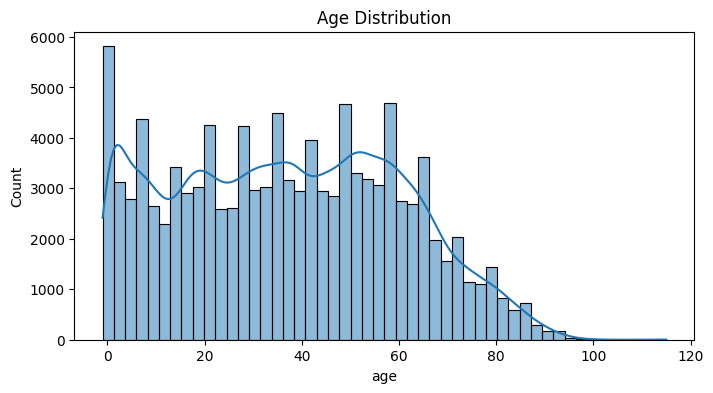

In [249]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.show()

In [250]:
print((df['age'] < 0).value_counts())
df1 = df[df['age'] >= 0]

age
False    110526
True          1
Name: count, dtype: int64


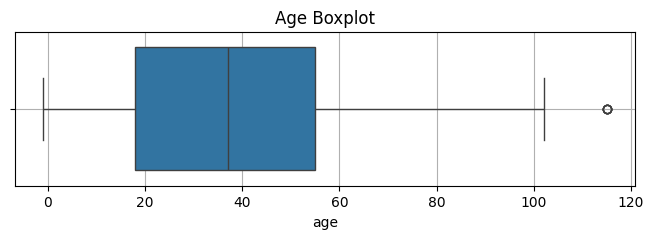

In [251]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['age'])
plt.title('Age Boxplot')
plt.grid(True)
plt.show()

In [252]:
df[df['age'] > 100]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [253]:
df1 = df1[df1['age'] <= 100]

In [254]:
df1['age_group'] = pd.cut(df1['age'], bins=[0, 18, 35, 50, 65, 80, 100], 
                         labels=['0–18', '19–35', '36–50', '51–65', '66–80', '81–100'])


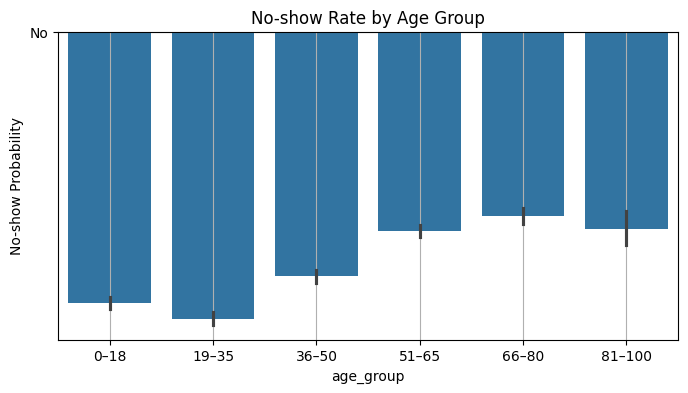

In [255]:
plt.figure(figsize=(8, 4))
sns.barplot(x='age_group', y='no_show', data=df1)
plt.title('No-show Rate by Age Group')
plt.ylabel('No-show Probability')
plt.grid(True)
plt.show()

#### Gender

- The dataset has a gender imbalance: 65% female and 35% male patients.
- Plotted gender distribution and found females dominate the sample.
- The no-show rate is slightly higher for females (20.3%) than males (19.9%), but the difference is minimal.
- Gender alone might not be a strong predictor but could be useful in interaction with other variables.

In [256]:
df1['gender'].value_counts()

gender
F    71832
M    38687
Name: count, dtype: int64

In [257]:
df1['gender'].value_counts(normalize=True)

gender
F    0.649952
M    0.350048
Name: proportion, dtype: float64

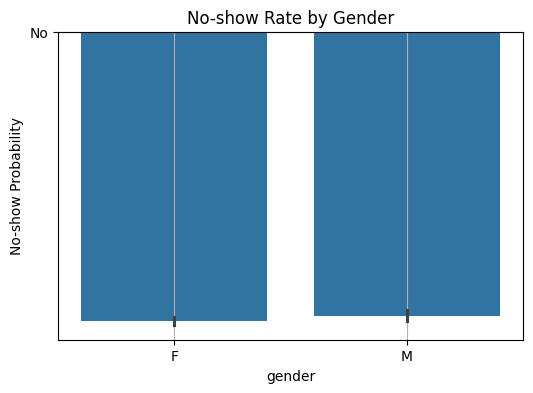

In [258]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='no_show', data=df)
plt.title("No-show Rate by Gender")
plt.ylabel("No-show Probability")
plt.grid(True)
plt.show()

In [259]:
pd.crosstab(df['gender'], df['no_show'], normalize='index')

no_show,No,Yes
gender,,
F,0.796854,0.203146
M,0.800321,0.199679


In [260]:
pd.crosstab([df['gender'], df['sms_received']], df['no_show'], normalize='index')

no_show                    No       Yes
gender sms_received                    
F      0             0.834712  0.165288
       1             0.722337  0.277663
M      0             0.829934  0.170066
       1             0.728369  0.271631

In [261]:
df1['age_group'] = pd.cut(df1['age'], bins=[0, 18, 35, 60, 100], labels=['<18', '18-35', '36-60', '60+'])
pd.crosstab([df1['age_group'], df1['sms_received']], df1['no_show'], normalize='index')

no_show                       No       Yes
age_group sms_received                    
<18       0             0.812039  0.187961
          1             0.686573  0.313427
18-35     0             0.814915  0.185085
          1             0.660041  0.339959
36-60     0             0.840507  0.159493
          1             0.746032  0.253968
60+       0             0.866119  0.133881
          1             0.807699  0.192301

In [262]:
df1= pd.get_dummies(df1, columns=['gender', 'age_group'], drop_first=False)

#### Scholarship

- Only **9.8%** of patients were enrolled in the scholarship program.
- Patients with scholarships had consistently **higher no-show rates** across all age groups.
- The **largest difference** in no-show rate was seen in the **36–60** age group (~3.7% higher).
- Gender did not significantly influence this trend — both males and females with scholarships missed more appointments.


In [263]:
df1['scholarship'].value_counts(normalize=True)

scholarship
0    0.901727
1    0.098273
Name: proportion, dtype: float64

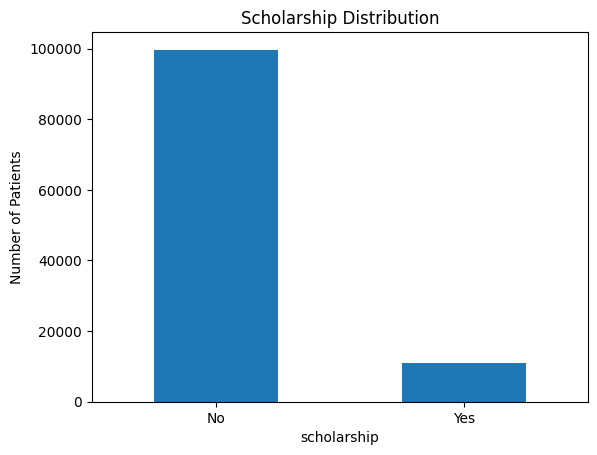

In [264]:
df1['scholarship'].value_counts().plot(kind='bar')
plt.title('Scholarship Distribution')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('Number of Patients')
plt.show()

In [265]:
df1['age_group'] = pd.cut(df1['age'], bins=[0, 18, 35, 60, 100], labels=['<18', '18–35', '36–60', '60+'])
pd.crosstab([df1['age_group'], df1['scholarship']], df1['no_show'], normalize='index')

no_show                      No       Yes
age_group scholarship                    
<18       0            0.777231  0.222769
          1            0.756519  0.243481
18–35     0            0.765409  0.234591
          1            0.737138  0.262862
36–60     0            0.812751  0.187249
          1            0.776089  0.223911
60+       0            0.848103  0.151897
          1            0.843866  0.156134

In [266]:
pd.crosstab([df['scholarship'], df['gender']], df['no_show'], normalize='index')

no_show                   No       Yes
scholarship gender                    
0           F       0.801737  0.198263
            M       0.802257  0.197743
1           F       0.762115  0.237885
            M       0.764940  0.235060

#### Hypertension

- About 20% of patients have hypertension in the dataset.
- Hypertensive patients generally show **lower no-show rates** compared to non-hypertensive patients, except for the under-18 group.
- The no-show rate for hypertensive children (<18) is notably higher (~10% more) than their non-hypertensive peers.
- This suggests hypertensive patients may be more consistent in attending appointments, possibly due to ongoing health concerns.

In [267]:
df['hypertension'].value_counts()

hypertension
0    88726
1    21801
Name: count, dtype: int64

In [268]:
pd.crosstab(df['hypertension'], df['no_show'], normalize='index')

no_show,No,Yes
hypertension,,
0,0.790963,0.209037
1,0.826980,0.173020


In [269]:
pd.crosstab([df1['age_group'], df1['hypertension']], df1['no_show'], normalize='index')

no_show                       No       Yes
age_group hypertension                    
<18       0             0.774785  0.225215
          1             0.675000  0.325000
18–35     0             0.760727  0.239273
          1             0.788366  0.211634
36–60     0             0.806329  0.193671
          1             0.816400  0.183600
60+       0             0.858122  0.141878
          1             0.839924  0.160076

In [270]:
pd.crosstab([df['gender'], df['hypertension']], df['no_show'], normalize='index')

no_show                    No       Yes
gender hypertension                    
F      0             0.788729  0.211271
       1             0.826781  0.173219
M      0             0.794880  0.205120
       1             0.827453  0.172547

#### Diabetes

- About 7% of patients have diabetes in the dataset.
- Overall, diabetic patients tend to have a **lower no-show rate** compared to non-diabetics.
- However, diabetic children (<18) show a **higher no-show rate** than their non-diabetic peers.
- Diabetes is an important feature to include in predictive models, with potential interactions by age.

In [271]:
df1['diabetes'].value_counts()

diabetes
0    102576
1      7943
Name: count, dtype: int64

In [272]:
pd.crosstab(df['diabetes'], df['no_show'], normalize='index')

no_show,No,Yes
diabetes,,
0,0.796372,0.203628
1,0.819967,0.180033


In [273]:
pd.crosstab([df['gender'], df['diabetes']], df['no_show'], normalize='index')

no_show                No       Yes
gender diabetes                    
F      0         0.795015  0.204985
       1         0.818587  0.181413
M      0         0.798845  0.201155
       1         0.823278  0.176722

In [274]:
pd.crosstab([df1['age_group'], df1['diabetes']], df1['no_show'], normalize='index')

no_show                   No       Yes
age_group diabetes                    
<18       0         0.774806  0.225194
          1         0.686275  0.313725
18–35     0         0.761992  0.238008
          1         0.725664  0.274336
36–60     0         0.808857  0.191143
          1         0.810308  0.189692
60+       0         0.852095  0.147905
          1         0.833599  0.166401

#### Alcoholism

- Approximately **3%** of patients reported having alcoholism.
- The overall no-show rate was nearly identical for alcoholics (20.15%) and non-alcoholics (20.19%).
- Female alcoholics showed a slightly higher no-show rate (25.18%) compared to non-alcoholic females (20.23%), though patterns varied across subgroups.
- Alcoholism may not be useful as an independent predictor but could be retained with **interaction terms** (e.g., with gender or age group) if needed for the model.

In [275]:
print(df1['alcoholism'].value_counts())
print(pd.crosstab(df['alcoholism'], df['no_show'], normalize='index'))
print(pd.crosstab([df['gender'], df['alcoholism']], df['no_show'], normalize='index'))
print(pd.crosstab([df1['age_group'], df1['alcoholism']], df1['no_show'], normalize='index'))

alcoholism
0    107159
1      3360
Name: count, dtype: int64
no_show           No       Yes
alcoholism                    
0           0.798054  0.201946
1           0.798512  0.201488
no_show                  No       Yes
gender alcoholism                    
F      0           0.797697  0.202303
       1           0.748160  0.251840
M      0           0.798741  0.201259
       1           0.827328  0.172672
no_show                     No       Yes
age_group alcoholism                    
<18       0           0.774853  0.225147
          1           0.571429  0.428571
18–35     0           0.762082  0.237918
          1           0.738739  0.261261
36–60     0           0.810155  0.189845
          1           0.789596  0.210404
60+       0           0.847161  0.152839
          1           0.869388  0.130612


In [276]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(df['alcoholism'], df['no_show'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f"Chi-square test p-value: {p}")

Chi-square test p-value: 0.9654188731603915


In [277]:
df1.head()

,patientid,appointmentid,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,gender_F,gender_M,age_group_<18,age_group_18-35,age_group_36-60,age_group_60+,age_group
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False,False,False,False,True,60+
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,True,False,False,True,False,36–60
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False,False,False,False,True,60+
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False,True,False,False,False,<18
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False,False,False,True,False,36–60


In [278]:
df1['alcoholism_female'] = df1['alcoholism'] * (df1['gender_M'] == False).astype(int)
df1['alcoholism_male'] = df1['alcoholism'] * (df1['gender_M'] == True).astype(int)
age_dummies = pd.get_dummies(df1['age_group'], prefix='age')
for col in age_dummies.columns:
    df1[f'alcoholism_{col}'] = df1['alcoholism'] * age_dummies[col]

In [279]:
df1.head()

,patientid,appointmentid,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,...,age_group_18-35,age_group_36-60,age_group_60+,age_group,alcoholism_female,alcoholism_male,alcoholism_age_<18,alcoholism_age_18–35,alcoholism_age_36–60,alcoholism_age_60+
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,...,False,False,True,60+,0,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,...,False,True,False,36–60,0,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,...,False,False,True,60+,0,0,0,0,0,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,...,False,False,False,<18,0,0,0,0,0,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,...,False,True,False,36–60,0,0,0,0,0,0


#### Handicap

- The binary feature `handicap_binary` indicates whether a patient has any handicap (1) or not (0).
- Around **2% of patients** have some form of handicap, with 18.1% no-show rate, slightly lower than the 20.2% in non-handicapped patients.
- Among **females**, handicapped patients show a modestly lower no-show rate (~18.6%) compared to non-handicapped (~20.3%).
- Among **males**, the difference is a bit more pronounced: ~17.2% no-show for handicapped vs. ~20.0% for non-handicapped.
- Across **age groups**, patients with a handicap generally have **lower or comparable no-show rates**, especially notable in `36–60` and `60+` age groups.
- This suggests potential **interaction effects** between `handicap_binary` and age/gender, which could be useful for modeling.

In [280]:
print(df1['handicap'].value_counts())
print(pd.crosstab(df['handicap'], df['no_show'], normalize='index'))
print(pd.crosstab([df['gender'], df['handicap']], df['no_show'], normalize='index'))
print(pd.crosstab([df1['age_group'], df1['handicap']], df1['no_show'], normalize='index'))

handicap
0    108282
1      2038
2       183
3        13
4         3
Name: count, dtype: int64
no_show         No       Yes
handicap                    
0         0.797647  0.202353
1         0.820764  0.179236
2         0.797814  0.202186
3         0.769231  0.230769
4         0.666667  0.333333
no_show                No       Yes
gender handicap                    
F      0         0.796584  0.203416
       1         0.816257  0.183743
       2         0.761905  0.238095
       3         1.000000  0.000000
       4         0.000000  1.000000
M      0         0.799634  0.200366
       1         0.826945  0.173055
       2         0.846154  0.153846
       3         0.700000  0.300000
       4         1.000000  0.000000
no_show                   No       Yes
age_group handicap                    
<18       0         0.775268  0.224732
          1         0.684932  0.315068
          2         0.902439  0.097561
          3         0.500000  0.500000
          4         0.500000  0.5000

In [281]:
df1['handicap_binary'] = (df1['handicap'] > 0).astype(int)

In [282]:
print(df1['handicap_binary'].value_counts())
print(pd.crosstab(df1['handicap_binary'], df1['no_show'], normalize='index'))
print(pd.crosstab([df1['gender_M'], df1['handicap_binary']], df['no_show'], normalize='index'))
print(pd.crosstab([df1['age_group'], df1['handicap_binary']], df1['no_show'], normalize='index'))


handicap_binary
0    108282
1      2237
Name: count, dtype: int64
no_show                No       Yes
handicap_binary                    
0                0.797639  0.202361
1                0.819401  0.180599
no_show                         No       Yes
gender_M handicap_binary                    
False    0                0.796572  0.203428
         1                0.813375  0.186625
True     0                0.799634  0.200366
         1                0.827550  0.172450
no_show                          No       Yes
age_group handicap_binary                    
<18       0                0.775268  0.224732
          1                0.714286  0.285714
18–35     0                0.760816  0.239184
          1                0.818182  0.181818
36–60     0                0.808430  0.191570
          1                0.834586  0.165414
60+       0                0.848376  0.151624
          1                0.839024  0.160976


In [283]:
age_dummies = pd.get_dummies(df1['age_group'], prefix='age')
for col in age_dummies.columns:
    df1[f'handicap_binary_{col}'] = df1['handicap_binary'] * age_dummies[col]

In [284]:
df1.head()

,patientid,appointmentid,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,...,alcoholism_male,alcoholism_age_<18,alcoholism_age_18–35,alcoholism_age_36–60,alcoholism_age_60+,handicap_binary,handicap_binary_age_<18,handicap_binary_age_18–35,handicap_binary_age_36–60,handicap_binary_age_60+
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


#### SMS Received

- About **32%** of patients received an SMS reminder, while **68% did not**.
- Interestingly, those who **did not receive an SMS** had a **lower no-show rate (16.7%)**, compared to those who did (27.6%).
- This counterintuitive pattern is consistent across **both genders** and **all age groups**, with SMS-receivers showing **higher no-show rates**.
- The **difference is especially stark** in younger age groups (e.g., 18–35: 18.5% vs 33.9%).
- The chi-square test indicates a **statistically significant** association (p-value ≈ 0), suggesting the feature carries predictive value.

In [285]:
print(df1['sms_received'].value_counts())
print(pd.crosstab(df1['sms_received'], df1['no_show'], normalize='index'))
print(pd.crosstab([df1['gender_M'], df1['sms_received']], df['no_show'], normalize='index'))
print(pd.crosstab([df1['age_group'], df1['sms_received']], df1['no_show'], normalize='index'))

sms_received
0    75038
1    35481
Name: count, dtype: int64
no_show             No       Yes
sms_received                    
0             0.832991  0.167009
1             0.724247  0.275753
no_show                      No       Yes
gender_M sms_received                    
False    0             0.834750  0.165250
         1             0.722326  0.277674
True     0             0.829934  0.170066
         1             0.728369  0.271631
no_show                       No       Yes
age_group sms_received                    
<18       0             0.812039  0.187961
          1             0.686573  0.313427
18–35     0             0.814915  0.185085
          1             0.660041  0.339959
36–60     0             0.840507  0.159493
          1             0.746032  0.253968
60+       0             0.866119  0.133881
          1             0.807699  0.192301


In [286]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110519 entries, 0 to 110526
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   patientid                  110519 non-null  float64 
 1   appointmentid              110519 non-null  int64   
 2   scheduledday               110519 non-null  object  
 3   appointmentday             110519 non-null  object  
 4   age                        110519 non-null  int64   
 5   neighbourhood              110519 non-null  object  
 6   scholarship                110519 non-null  int64   
 7   hypertension               110519 non-null  int64   
 8   diabetes                   110519 non-null  int64   
 9   alcoholism                 110519 non-null  int64   
 10  handicap                   110519 non-null  int64   
 11  sms_received               110519 non-null  int64   
 12  no_show                    110519 non-null  object  
 13  gender_F           

#### Neighbourhood

- **High cardinality**: 81 unique neighbourhoods, with counts ranging from ~7,700 (Jardim Camburi) down to single observations (Parque Industrial).  
- **Imbalanced distribution**: A handful of areas account for a large share of appointments, while many are very rare.  
- **No-show variability**: Mean no-show rates span roughly 12% to 28% across neighbourhoods, indicating strong location-based effects.  
- **Statistical significance**: Chi-square p-value ≈ 2×10⁻⁶⁰ confirms a robust association between neighbourhood and no-show.  
- **Risk grouping**: Collapsing rare categories into “Other” and binning by quartiles produced four meaningful risk levels (`Low`, `Medium`, `High`, `Very High`) with no-show rates from ~17% up to ~24%.  
- **Recommendation**: In modeling, use target- or frequency-encoding (or the 4-level bin) rather than one-hot, and group rare areas to reduce noise.

In [287]:
print(df1['neighbourhood'].value_counts())
print(pd.crosstab(df1['neighbourhood'], df1['no_show'], normalize='index'))
print(pd.crosstab([df1['gender_M'], df1['neighbourhood']], df['no_show'], normalize='index'))
print(pd.crosstab([df1['age_group'], df1['neighbourhood']], df1['no_show'], normalize='index'))
from scipy.stats import chi2_contingency
ct = pd.crosstab(df1['neighbourhood'], df1['no_show'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f"Chi-square test p-value: {p}")

neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64
no_show                    No       Yes
neighbourhood                          
AEROPORTO            0.875000  0.125000
ANDORINHAS           0.770593  0.229407
ANTÔNIO HONÓRIO      0.815498  0.184502
ARIOVALDO FAVALESSA  0.780142  0.219858
BARRO VERMELHO       0.784870  0.215130
...                       ...       ...
SÃO JOSÉ             0.783401  0.216599
SÃO PEDRO            0.789624  0.210376
TABUAZEIRO           0.817050  0.182950
UNIVERSITÁRIO        0.789474  0.210526
VILA RUBIM           0.834313  0.165687

[81 rows x 2 columns]
no_show  

In [288]:
neighbourhood_stats = df.groupby('neighbourhood')['no_show'].value_counts(normalize=True).unstack()

In [289]:
df1['no_show_bin'] = (df1['no_show'] == 'Yes').astype(int)
threshold = 50
counts = df1['neighbourhood'].value_counts()
rare = counts[counts < threshold].index
df1['neighbourhood_collapsed'] = df1['neighbourhood'].where(
    ~df1['neighbourhood'].isin(rare), 'Other'
)
mean_ns = df1.groupby('neighbourhood_collapsed')['no_show_bin'].mean()
edges = mean_ns.quantile([0, .25, .5, .75, 1.0]).values
labels = ['Low', 'Medium', 'High', 'Very_High']
bin_mapping = pd.cut(mean_ns.values, bins=edges, labels=labels, include_lowest=True)
neigh_to_bin = dict(zip(mean_ns.index, bin_mapping))
df1['neighbourhood_bin'] = df1['neighbourhood_collapsed'].map(neigh_to_bin)
print(df1['no_show_bin'].head())
print(df1['neighbourhood_collapsed'].value_counts().head())
print(df1['neighbourhood_bin'].value_counts())
print(df1.groupby('neighbourhood_bin')['no_show_bin'].mean())


0    0
1    0
2    0
3    0
4    0
Name: no_show_bin, dtype: int64
neighbourhood_collapsed
JARDIM CAMBURI     7717
MARIA ORTIZ        5804
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: count, dtype: int64
neighbourhood_bin
High         34222
Medium       27586
Very_High    25412
Low          23299
Name: count, dtype: int64
neighbourhood_bin
High         0.207147
Low          0.168977
Medium       0.189444
Very_High    0.238627
Name: no_show_bin, dtype: float64


In [290]:
neigh_bin_dummies = pd.get_dummies(df1['neighbourhood_bin'], prefix='neigh_bin')
df1 = pd.concat([df1, neigh_bin_dummies], axis=1)
df1.drop(columns=['neighbourhood', 'neighbourhood_collapsed', 'neighbourhood_bin'], inplace=True)
print(df1.filter(like='neigh_bin_').head())

   neigh_bin_High  neigh_bin_Low  neigh_bin_Medium  neigh_bin_Very_High
0           False           True             False                False
1           False           True             False                False
2           False           True             False                False
3           False           True             False                False
4           False           True             False                False


In [291]:
df1.head()

,patientid,appointmentid,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,...,handicap_binary,handicap_binary_age_<18,handicap_binary_age_18–35,handicap_binary_age_36–60,handicap_binary_age_60+,no_show_bin,neigh_bin_High,neigh_bin_Low,neigh_bin_Medium,neigh_bin_Very_High
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,0,0,0,0,0,0,False,True,False,False
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,0,0,0,0,0,0,False,True,False,False
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,0,0,0,0,0,0,False,True,False,False
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,...,0,0,0,0,0,0,False,True,False,False
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,...,0,0,0,0,0,0,False,True,False,False


#### Schedule day and Appointed day

- **Waiting time** (`wait_days`): Ranges 0–178 days (median 3, mean ~9.5); longer waits drive higher no-shows (9% at 0 days → 33% at 21+ days; p ≈ 0).  
- **Binned wait**: Six bins (`0`, `1`, `2–5`, `6–10`, `11–20`, `21+`) capture nonlinear jumps in no-show rate—ideal for one-hot encoding or embedding.  
- **Appointment weekday** (`appt_wday`): No-show rates vary modestly (Thursday lowest ~19.3%, Saturday highest ~23.1%), suggesting day-of-week effects.  
- **Scheduled weekday & hour**: Extracting `sched_wday` and `sched_hour` can reveal batch-scheduling or reminder timing patterns (e.g., fewer reminders on weekends).  
- **Feature derivation**: Drop raw timestamps after extracting `wait_days`, `wait_bin`, `appt_wday`, `sched_wday`, and `sched_hour`.

In [292]:
df1['scheduled_dt']   = pd.to_datetime(df1['scheduledday'])
df1['appointment_dt'] = pd.to_datetime(df1['appointmentday'])
df1['wait_days'] = (df1['appointment_dt'] - df1['scheduled_dt']).dt.days
df1['wait_days'] = df1['wait_days'].clip(lower=0)
print(df1['wait_days'].describe())


count    110519.000000
mean          9.532922
std          15.027901
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: wait_days, dtype: float64


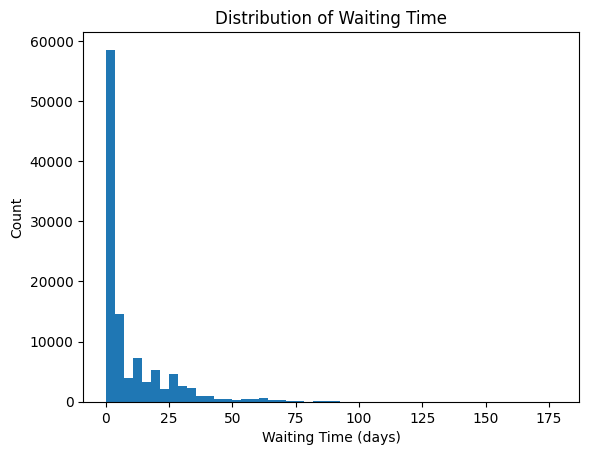

In [293]:
plt.hist(df1['wait_days'], bins=50)
plt.xlabel('Waiting Time (days)')
plt.ylabel('Count')
plt.title('Distribution of Waiting Time')
plt.show()


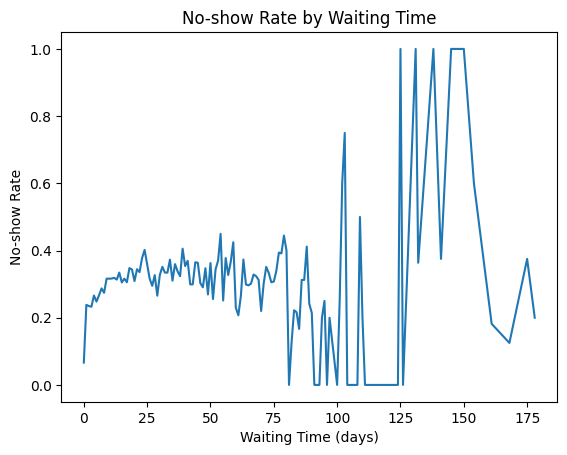

In [294]:
ns_by_wait = df1.groupby('wait_days')['no_show_bin'].mean()
plt.plot(ns_by_wait.index, ns_by_wait.values)
plt.xlabel('Waiting Time (days)')
plt.ylabel('No-show Rate')
plt.title('No-show Rate by Waiting Time')
plt.show()


In [295]:
bins = [0,1,2,5,10,20,df1['wait_days'].max()]
labels = ['0','1','2–5','6–10','11–20','21+']
df1['wait_bin'] = pd.cut(df1['wait_days'], bins=bins, labels=labels, include_lowest=True)
pd.crosstab(df1['wait_bin'], df1['no_show'], normalize='index')


no_show,No,Yes
wait_bin,,
0,0.910657,0.089343
1,0.765265,0.234735
2–5,0.753729,0.246271
6–10,0.717405,0.282595
11–20,0.680244,0.319756
21+,0.670234,0.329766


In [296]:
df1['sched_wday'] = df1['scheduled_dt'].dt.day_name()
df1['appt_wday']  = df1['appointment_dt'].dt.day_name()
df1['sched_hour'] = df1['scheduled_dt'].dt.hour
pd.crosstab(df1['appt_wday'], df1['no_show'], normalize='index').sort_index()


no_show,No,Yes
appt_wday,,
Friday,0.787727,0.212273
Monday,0.793545,0.206455
Saturday,0.769231,0.230769
Thursday,0.806541,0.193459
Tuesday,0.799056,0.200944
Wednesday,0.803108,0.196892


In [297]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(df1['wait_bin'], df1['no_show'])
chi2, p, _, _ = chi2_contingency(ct)
print(f"Waiting-time vs no-show p-value: {p}")


Waiting-time vs no-show p-value: 0.0


In [298]:
df1.head()

,patientid,appointmentid,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,...,neigh_bin_Low,neigh_bin_Medium,neigh_bin_Very_High,scheduled_dt,appointment_dt,wait_days,wait_bin,sched_wday,appt_wday,sched_hour
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,True,False,False,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,18
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,True,False,False,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,16
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,True,False,False,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,16
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,...,True,False,False,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,17
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,...,True,False,False,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,16


#### Patient ID

- **Purpose**: Uniquely identifies each patient, but reused across multiple appointments.
- **Usage**: Helpful for tracking repeat behavior.
- **Repeat visits**: Many patients have more than one appointment — indicates potential for behavioral patterns (e.g., habitual no-shows).
- **Potential feature**:
  - Features like `past_appointments` or `past_no_show_rate` per patient.

In [299]:
unique_patients = df1['patientid'].nunique()
total_rows = df1.shape[0]
print(f"Unique patients: {unique_patients}, Total appointments: {total_rows}")
appointment_counts = df1['patientid'].value_counts()
appointment_counts.describe()

Unique patients: 62294, Total appointments: 110519


count    62294.000000
mean         1.774152
std          1.770362
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: count, dtype: float64

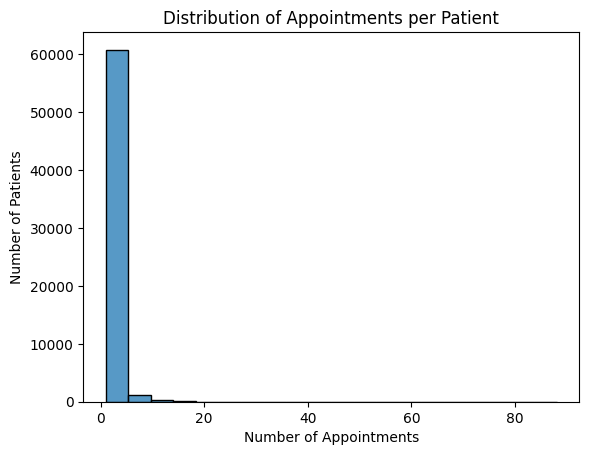

In [300]:
sns.histplot(appointment_counts, bins=20, kde=False)
plt.title("Distribution of Appointments per Patient")
plt.xlabel("Number of Appointments")
plt.ylabel("Number of Patients")
plt.show()

In [301]:
df1['appointment_rank'] = df1.groupby('patientid')['scheduled_dt'].rank(method='first')
df1['past_appointments'] = df1['appointment_rank'] - 1

In [302]:
df1['no_show_bin'] = df1['no_show'].map({'No': 0, 'Yes': 1})
no_show_rate = df1.groupby('patientid')['no_show_bin'].mean().rename('patient_no_show_rate')
df1 = df1.merge(no_show_rate, on='patientid')

In [303]:
df1[['past_appointments', 'patient_no_show_rate', 'no_show_bin']].corr()

,past_appointments,patient_no_show_rate,no_show_bin
past_appointments,1.000000,-0.033449,-0.035468
patient_no_show_rate,-0.033449,1.000000,0.782187
no_show_bin,-0.035468,0.782187,1.000000


#### Appointment ID
- **Purpose**: Uniquely identifies each individual booking.
- **Usage**: Purely administrative — no predictive value.
- Dropping it as it has no predictive power

In [304]:
df1.drop(columns=['appointmentid'],axis=1)

,patientid,scheduledday,appointmentday,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,...,scheduled_dt,appointment_dt,wait_days,wait_bin,sched_wday,appt_wday,sched_hour,appointment_rank,past_appointments,patient_no_show_rate
0,2.987250e+13,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,...,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,18,2.0,1.0,0.00
1,5.589978e+14,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,...,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,16,2.0,1.0,0.00
2,4.262962e+12,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,...,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,16,2.0,1.0,0.00
3,8.679512e+11,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,...,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,17,2.0,1.0,0.50
4,8.841186e+12,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,...,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,0,Friday,Friday,16,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110514,2.572134e+12,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,0,1,...,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,34,21+,Tuesday,Tuesday,9,2.0,1.0,0.50
110515,3.596266e+12,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,0,1,...,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,34,21+,Tuesday,Tuesday,7,3.0,2.0,0.25
110516,1.557663e+13,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,0,1,...,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,40,21+,Wednesday,Tuesday,16,1.0,0.0,0.00
110517,9.213493e+13,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,0,1,...,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,40,21+,Wednesday,Tuesday,15,1.0,0.0,0.00


In [305]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   patientid                  110519 non-null  float64            
 1   appointmentid              110519 non-null  int64              
 2   scheduledday               110519 non-null  object             
 3   appointmentday             110519 non-null  object             
 4   age                        110519 non-null  int64              
 5   scholarship                110519 non-null  int64              
 6   hypertension               110519 non-null  int64              
 7   diabetes                   110519 non-null  int64              
 8   alcoholism                 110519 non-null  int64              
 9   handicap                   110519 non-null  int64              
 10  sms_received               110519 non-null  int64       

#### Dropping unnecessary columns

In [306]:
cols_to_drop = ['appointmentid','scheduledday','appointmentday','handicap','age_group','patientid','appointment_rank','gender_F','neigh_bin_Low','scheduled_dt','appointment_dt','no_show']
df1.drop(columns=cols_to_drop, inplace=True)
print("Remaining columns:", df1.columns.tolist())

Remaining columns: ['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received', 'gender_M', 'age_group_<18', 'age_group_18-35', 'age_group_36-60', 'age_group_60+', 'alcoholism_female', 'alcoholism_male', 'alcoholism_age_<18', 'alcoholism_age_18–35', 'alcoholism_age_36–60', 'alcoholism_age_60+', 'handicap_binary', 'handicap_binary_age_<18', 'handicap_binary_age_18–35', 'handicap_binary_age_36–60', 'handicap_binary_age_60+', 'no_show_bin', 'neigh_bin_High', 'neigh_bin_Medium', 'neigh_bin_Very_High', 'wait_days', 'wait_bin', 'sched_wday', 'appt_wday', 'sched_hour', 'past_appointments', 'patient_no_show_rate']


In [307]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   age                        110519 non-null  int64   
 1   scholarship                110519 non-null  int64   
 2   hypertension               110519 non-null  int64   
 3   diabetes                   110519 non-null  int64   
 4   alcoholism                 110519 non-null  int64   
 5   sms_received               110519 non-null  int64   
 6   gender_M                   110519 non-null  bool    
 7   age_group_<18              110519 non-null  bool    
 8   age_group_18-35            110519 non-null  bool    
 9   age_group_36-60            110519 non-null  bool    
 10  age_group_60+              110519 non-null  bool    
 11  alcoholism_female          110519 non-null  int64   
 12  alcoholism_male            110519 non-null  int64   
 13  alcoholism_age

#### One hot encoding

In [308]:
cat_cols = ['wait_bin', 'sched_wday', 'appt_wday']
dummies = pd.get_dummies(df1[cat_cols], prefix=cat_cols, drop_first=True)
df1 = pd.concat([df1, dummies], axis=1).drop(columns=cat_cols)
print("Final columns:", df1.columns.tolist())

Final columns: ['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received', 'gender_M', 'age_group_<18', 'age_group_18-35', 'age_group_36-60', 'age_group_60+', 'alcoholism_female', 'alcoholism_male', 'alcoholism_age_<18', 'alcoholism_age_18–35', 'alcoholism_age_36–60', 'alcoholism_age_60+', 'handicap_binary', 'handicap_binary_age_<18', 'handicap_binary_age_18–35', 'handicap_binary_age_36–60', 'handicap_binary_age_60+', 'no_show_bin', 'neigh_bin_High', 'neigh_bin_Medium', 'neigh_bin_Very_High', 'wait_days', 'sched_hour', 'past_appointments', 'patient_no_show_rate', 'wait_bin_1', 'wait_bin_2–5', 'wait_bin_6–10', 'wait_bin_11–20', 'wait_bin_21+', 'sched_wday_Monday', 'sched_wday_Saturday', 'sched_wday_Thursday', 'sched_wday_Tuesday', 'sched_wday_Wednesday', 'appt_wday_Monday', 'appt_wday_Saturday', 'appt_wday_Thursday', 'appt_wday_Tuesday', 'appt_wday_Wednesday']


In [309]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        110519 non-null  int64  
 1   scholarship                110519 non-null  int64  
 2   hypertension               110519 non-null  int64  
 3   diabetes                   110519 non-null  int64  
 4   alcoholism                 110519 non-null  int64  
 5   sms_received               110519 non-null  int64  
 6   gender_M                   110519 non-null  bool   
 7   age_group_<18              110519 non-null  bool   
 8   age_group_18-35            110519 non-null  bool   
 9   age_group_36-60            110519 non-null  bool   
 10  age_group_60+              110519 non-null  bool   
 11  alcoholism_female          110519 non-null  int64  
 12  alcoholism_male            110519 non-null  int64  
 13  alcoholism_age_<18         11

#### Converting final dataframe to csv

In [310]:
df1.to_csv('data.csv', index=False)